In [9]:
from qutip import *
import matplotlib.pyplot as plt
import numpy as np
from arc import *

### time-dependent Hamiltonian
an example from the Qutip docs

In [26]:
ustate = basis(3, 0) # column vector (1, 0, 0)
excited = basis(3, 1) # column vector (0, 1, 0)
ground = basis(3, 2) # column vector (0, 0, 1)

In [27]:
ustate

Quantum object: dims=[[3], [1]], shape=(3, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]
 [0.]]

In [28]:
# this is basically the outer product of the states, which forms a coupling term
ground * excited.dag()

Quantum object: dims=[[3], [3]], shape=(3, 3), type='oper', dtype=Dense, isherm=False
Qobj data =
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 1. 0.]]

In [36]:
N = 2 # Set where to truncate Fock state for cavity
sigma_ge = tensor(qeye(N), ground * excited.dag())  # |g><e|
sigma_ue = tensor(qeye(N), ustate * excited.dag())  # |u><e|
a = tensor(destroy(N), qeye(3))
ada = tensor(num(N), qeye(3)) # the number op

c_ops = []  # Build collapse operators
kappa = 1.5 # Cavity decay rate
c_ops.append(np.sqrt(kappa) * a)
gamma = 6  # Atomic decay rate
c_ops.append(np.sqrt(5*gamma/9) * sigma_ue) # Use Rb branching ratio of 5/9 e->u
c_ops.append(np.sqrt(4*gamma/9) * sigma_ge) # 4/9 e->g

t = np.linspace(-15, 15, 100) # Define time vector
psi0 = tensor(basis(N, 0), ustate) # Define initial state

state_GG = tensor(basis(N, 1), ground) # Define states on which to project
sigma_GG = state_GG * state_GG.dag()
state_UU = tensor(basis(N, 0), ustate)
sigma_UU = state_UU * state_UU.dag()

g = 5  # coupling strength
H0 = -g * (sigma_ge.dag() * a + a.dag() * sigma_ge)  # time-independent term: ge transition interaacts with cavity
H1 = (sigma_ue.dag() + sigma_ue)  # time-dependent term: ue transition driven externally

In [46]:
def H1_coeff(t):
    return 9 * np.exp(-(t / 5.) ** 2)

H = [H0, [H1, H1_coeff]]
output = mesolve(H, psi0, t, c_ops, e_ops=[ada, sigma_UU, sigma_GG])

Text(0.5, 0, 'Time')

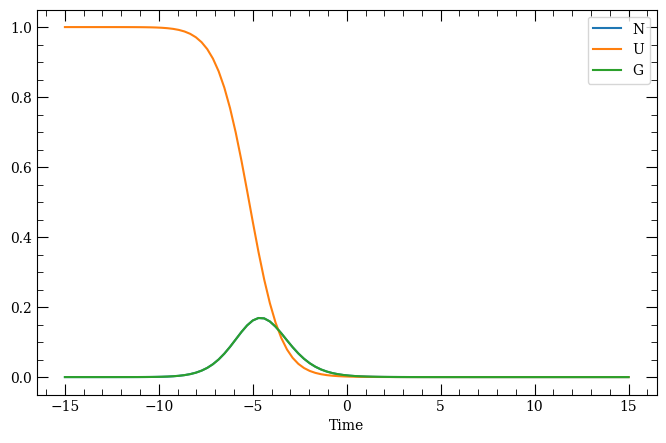

In [49]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(t, output.expect[0], label="N")
ax.plot(t, output.expect[1], label="U")
ax.plot(t, output.expect[2], label="G")
ax.legend()
ax.set_xlabel("Time")

### Emission/absorption of single photons by four-level atom
See "Time-Reversal-Symmetric Single-Photon Wave Packets for Free-Space
 Quantum Communication"

In [ ]:
# I believe it is assumed in what follows that atomic emission is pi polarizaed,
# which is converted to radial polarization by a deep parabolic mirror,
# or reciprocally, incident polarization converted into pi emission to
# be absorbed by an atom. in this way, we can ignore emission into
# unwanted spatial modes, making this cavity-esque. maybe

# atomic states (fig. 2 in the paper)
g1state = basis(4, 0) # column vector (1, 0, 0, 0)
hstate = basis(4, 1) # column vector (0, 1, 0, 0)
rstate = basis(4, 2) # column vector (0, 0, 1, 0)
g2state = basis(4, 3) # column vector (0, 0, 0, 1)

N = 1 # number of photons that can be emitted/absorbed
sigma_g1h = tensor(qeye(N), g1state * hstate.dag())  # |g1><h|
sigma_rh = tensor(qeye(N), rstate * hstate.dag())  # |r><h|
sigma_g2r = tensor(qeye(N), g2state * rstate.dag())  # |g2><r|

a = tensor(destroy(N), qeye(3)) # annihilation
ada = tensor(num(N), qeye(3)) # the number op

gamma = 6  # Atomic decay rate from r to g2
c_ops = []  # Build collapse operators
c_ops.append(np.sqrt(gamma) * a) # photon collapse on g2->r
c_ops.append(np.sqrt(gamma) * sigma_g2r) # assume h is metastable

t = np.linspace(-15, 15, 100) # Define time vector
psi0 = tensor(basis(N, 0), g1state) # Define initial state

# Define atom-photon states on which to project
state_g1 = tensor(basis(N, 0), g1state) 
state_h = tensor(basis(N, 0), hstate) 
state_r = tensor(basis(N, 0), rstate) 
state_g2 = tensor(basis(N, 1), g2state)

# Projectors
proj_g1 = state_g1 * state_g1.dag()
proj_h = state_h * state_h.dag()
proj_r = state_r * state_r.dag()
proj_g2 = state_g2 * state_g2.dag()

Edotd = ?
H_quantized = Edotd * (sigma_g2r.dag() * a + a.dag() * sigma_g2r)  # time-independent term: ge transition interaacts with cavity
H_classical = (sigma_ue.dag() + sigma_ue)  # time-dependent term: ue transition driven externally

### 3-level atom STIRAP

In [26]:
ustate = basis(3, 0) # column vector (1, 0, 0)
excited = basis(3, 1) # column vector (0, 1, 0)
ground = basis(3, 2) # column vector (0, 0, 1)

In [27]:
ustate

Quantum object: dims=[[3], [1]], shape=(3, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]
 [0.]]

In [28]:
# this is basically the outer product of the states, which forms a coupling term
ground * excited.dag()

Quantum object: dims=[[3], [3]], shape=(3, 3), type='oper', dtype=Dense, isherm=False
Qobj data =
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 1. 0.]]

In [36]:
N = 2 # Set where to truncate Fock state for cavity
sigma_ge = tensor(qeye(N), ground * excited.dag())  # |g><e|
sigma_ue = tensor(qeye(N), ustate * excited.dag())  # |u><e|
a = tensor(destroy(N), qeye(3))
ada = tensor(num(N), qeye(3)) # the number op

c_ops = []  # Build collapse operators
kappa = 1.5 # Cavity decay rate
c_ops.append(np.sqrt(kappa) * a)
gamma = 6  # Atomic decay rate
c_ops.append(np.sqrt(5*gamma/9) * sigma_ue) # Use Rb branching ratio of 5/9 e->u
c_ops.append(np.sqrt(4*gamma/9) * sigma_ge) # 4/9 e->g

t = np.linspace(-15, 15, 100) # Define time vector
psi0 = tensor(basis(N, 0), ustate) # Define initial state

state_GG = tensor(basis(N, 1), ground) # Define states on which to project
sigma_GG = state_GG * state_GG.dag()
state_UU = tensor(basis(N, 0), ustate)
sigma_UU = state_UU * state_UU.dag()

g = 5  # coupling strength
H0 = -g * (sigma_ge.dag() * a + a.dag() * sigma_ge)  # time-independent term: ge transition interaacts with cavity
H1 = (sigma_ue.dag() + sigma_ue)  # time-dependent term: ue transition driven externally

In [46]:
def H1_coeff(t):
    return 9 * np.exp(-(t / 5.) ** 2)

H = [H0, [H1, H1_coeff]]
output = mesolve(H, psi0, t, c_ops, e_ops=[ada, sigma_UU, sigma_GG])

Text(0.5, 0, 'Time')

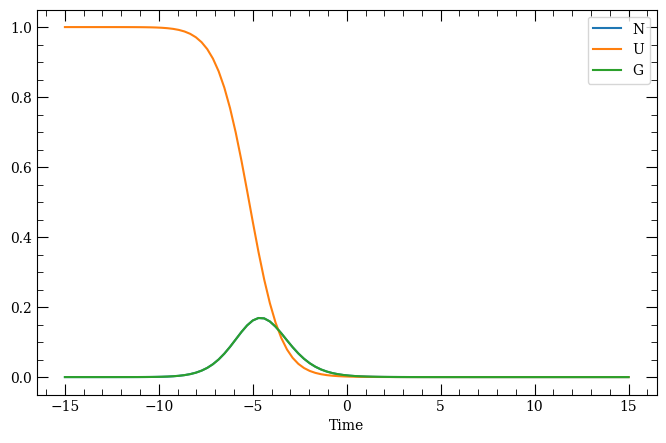

In [49]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(t, output.expect[0], label="N")
ax.plot(t, output.expect[1], label="U")
ax.plot(t, output.expect[2], label="G")
ax.legend()
ax.set_xlabel("Time")

In [13]:
w = 10
dt = 20
t_exp = 120

Omax = 2*np.pi*.4 # this width and amplitude give A = 2*pi
Omega2 = lambda t: Omax*e**(-((t+dt/2)/w)**2/2)
Omega1 = lambda t: Omax* e**(-((t-dt/2)/w)**2/2)

Delta1 = 0.1*Omax # (finite to prevent 1/0 error in D2)
Delta2 = -Delta1 

# construct the time-dependent Hamiltonian

H_q = QobjEvo(np.array([[0,Omega1,0],[Omega1,Delta1, Omega2],[0,Omega2, Delta2]],dtype=complex))

psi_0 = basis(3,0)
t_list = np.linspace(0,10,1000)

gamma1 = 0.3
gamma2 = 0.01
dec_op1 = np.sqrt(gamma)*Qobj([[0,1,0],[0,0,0],[0,0,0]])
dec_op2 = np.sqrt(gamma)*Qobj([[0,0,1],[0,0,0],[0,0,0]])

results = mesolve(H_q,psi_0,t_list) #[dec_op1, dec_op2],[])

TypeError: must be real number, not function

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dia, isherm=False
Qobj data =
[[0. 1.]
 [0. 0.]]

In [16]:
np.outer([1,0,0],[1,0,0])

array([[1, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [21]:
np.outer([1,0,0],[0,1,0]).transpose()

array([[0, 0, 0],
       [1, 0, 0],
       [0, 0, 0]])